In [4]:
%matplotlib inline  
import matplotlib.pyplot as plt 
from collections import Counter
import math
from collections import Counter
import numpy as np
from scipy.special import comb
import itertools as it
%load_ext line_profiler
from imp import reload
import itertools as it
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(0, '../mallows kendall')
import mallows_kendall as mk
import cego_lop as cego
from scipy import optimize
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


ref
- http://www.spotseven.de/wp-content/papercite-data/pdf/zaef14c.pdf
- https://dl.acm.org/doi/pdf/10.1145/2576768.2598282  
  

In [8]:
reload(cego)
cego.runR(5,10,0.1)

<class 'ValueError'>: 59.0
<class 'ValueError'>: 13.0
<class 'ValueError'>: 67.0
<class 'ValueError'>: 51.0
<class 'ValueError'>: 49.0
R[write to console]: Error in res$y[[indbest]] : 
  attempt to select less than one element in get1index



RRuntimeError: Error in res$y[[indbest]] : 
  attempt to select less than one element in get1index


In [102]:
def solve_one(problem, instance,ms, rho, repe,  m_ini, phi_ini, true_sol, best_fitness=1):
    res = []
    n = instance.shape[0]
    sample = [np.random.permutation(range(n)) for _ in range(m_ini)]
    fitnesses = [get_fitness(perm, instance,problem) for perm in sample] 
    for m in range(ms):
        #if m%10 == 9:print("ws, fitnesses",ws, fitnesses)
        ws = np.array(fitnesses.copy())
        ws = ws-ws.min()
        ws = ws/ws.max()
        ws = rho**(1-ws)
        borda = uborda(np.array(sample),ws)
        phi_estim = u_phi(sample,borda, ws)
        expected_dist = get_expected_distance((m+1)/ms,(n-1)*n/4)#initial distance is the expectred at uniformity
        phi_sample = mk.find_phi(n, expected_dist, expected_dist+1)
        #phi_estim = 1 - (m+1)/(ms)
        perm = mk.samplingMM(1,n, phi=phi_sample, k=None)[0]
        perm = perm[borda]
        sample.append(perm)
        fitnesses.append(get_fitness(perm, instance,problem))
        #print(perm,fitnesses[-1])
        res.append([problem,repe,m,rho,fitnesses[-1]/best_fitness,phi_estim,phi_sample,mk.kendallTau(borda,true_sol)])
    return res

best* fitness 34484.0 worst* fitness 3516.0 (*distributed according to)
best* fitness 34362.0 worst* fitness 3638.0 (*distributed according to)
best* fitness 34575.0 worst* fitness 3425.0 (*distributed according to)
best* fitness 34602.0 worst* fitness 3398.0 (*distributed according to)
best* fitness 34530.0 worst* fitness 3470.0 (*distributed according to)
best* fitness 34499.0 worst* fitness 3501.0 (*distributed according to)
best* fitness 34665.0 worst* fitness 3335.0 (*distributed according to)
best* fitness 34475.0 worst* fitness 3525.0 (*distributed according to)
best* fitness 34576.0 worst* fitness 3424.0 (*distributed according to)
best* fitness 34558.0 worst* fitness 3442.0 (*distributed according to)
best* fitness 34448.0 worst* fitness 3552.0 (*distributed according to)
best* fitness 34647.0 worst* fitness 3353.0 (*distributed according to)
best* fitness 34475.0 worst* fitness 3525.0 (*distributed according to)
best* fitness 34519.0 worst* fitness 3481.0 (*distributed accord

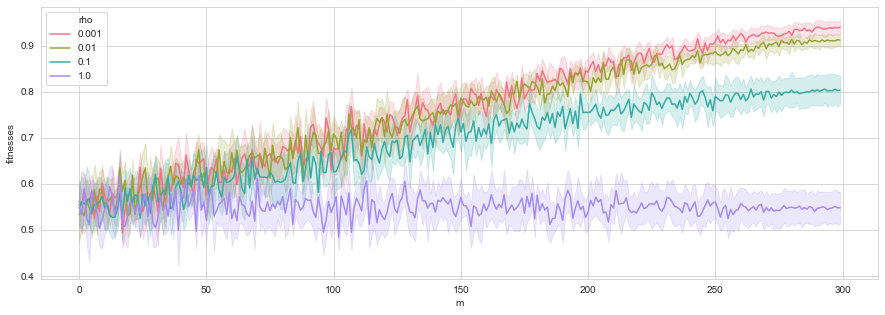

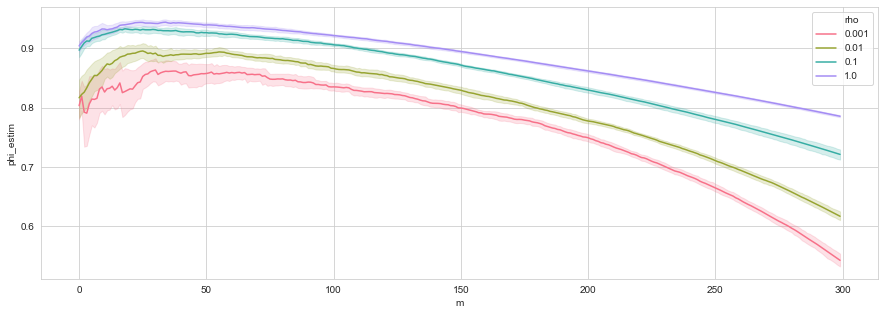

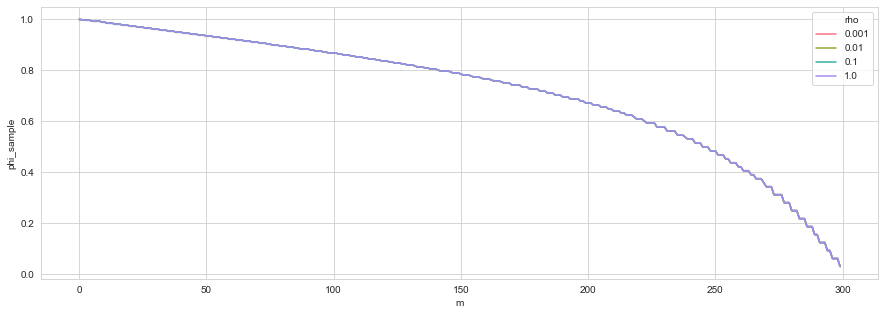

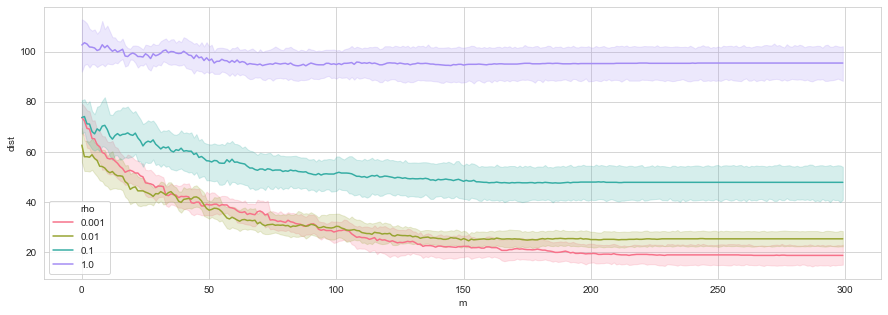

In [108]:
#def test():
n = 20
ms = 300
m_ini = 10
repes = 10
rhos = [.001,.01,.1,1] #np.linspace(0,1,10)#
phi_ini = 0.9999
m_inst,phi_instance = 10*n,0.5
res = []
problem="LOP"
for rho in rhos:
  for repe in range(repes):
      instance = sinthetic_LOP(n,m_inst,phi_instance)
      true_sol = list(range(n))
      print("best* fitness",get_fitness(true_sol, instance,problem),"worst* fitness",get_fitness(true_sol[::-1], instance,problem),"(*distributed according to)")
      #print(instance)
      res = res + solve_one("LOP",instance,ms, rho, repe,  m_ini, phi_ini,true_sol, get_fitness(true_sol, instance,problem),)

df = pd.DataFrame(res, columns=['problem','repe','m','rho','fitnesses','phi_estim','phi_sample','dist'])
paint(df )
  
#%lprun -f solve_one test()

# TODO
- meter más problemas: **PFSP**, TSP, ...
- comparar con otras alternativas: LS? 
- el símil con la optimización bayesiana no está claro, cómo se traslada aquí la función de utilidad?
- demostración de convergencia rápida 
- escribir draft para tener el modelo claro